### Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality?
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

In [3]:
choc = pd.read_csv('chocolate_bars.csv')
choc.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [7]:
#knowing the data
print(choc.shape) #2530 rows, 10 columns
print(choc.describe())
print(choc.info())
choc.isna().sum()
choc = choc.dropna()
choc

(2443, 11)
                id  year_reviewed  cocoa_percent  num_ingredients      rating
count  2443.000000    2443.000000    2443.000000      2443.000000  2443.00000
mean   1451.520262    2014.485878      71.496725         3.041343     3.21009
std     755.521714       3.957507       5.156974         0.913728     0.42837
min       5.000000    2006.000000      42.000000         1.000000     1.00000
25%     833.000000    2012.000000      70.000000         2.000000     3.00000
50%    1474.000000    2015.000000      70.000000         3.000000     3.25000
75%    2100.000000    2018.000000      74.000000         4.000000     3.50000
max    2712.000000    2021.000000     100.000000         6.000000     4.00000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2443 non-null   int64  
 1   manufacturer      2443 non-null   

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


##### Insights:
This data set appears to have a time period between 2006 and 2021. The number of ingredients range from 1 to 6, the average rating of a chocolate bar is 3.2, and the average cocoa percent is roughly 71.5.

In [8]:
#What is the average rating by country of origin?
choc['bean_origin'].unique()
choc.groupby('bean_origin').rating.mean().sort_values(ascending = False)


bean_origin
China                    3.500000
Sao Tome & Principe      3.500000
Solomon Islands          3.450000
Congo                    3.318182
Thailand                 3.300000
                           ...   
Martinique               2.750000
Sierra Leone             2.750000
Principe                 2.750000
St.Vincent-Grenadines    2.750000
Puerto Rico              2.714286
Name: rating, Length: 62, dtype: float64

#####  Insights:
China, Sao Tome & Principe, Solomon Islands and Congo are the countries with the highest rated bars.

In [9]:
#How many bars were reviewed for each of those countries?
choc.groupby('bean_origin')['bar_name'].count().sort_values(ascending=False)

bean_origin
Venezuela                246
Peru                     231
Dominican Republic       220
Ecuador                  201
Madagascar               171
                        ... 
Suriname                   1
Sumatra                    1
Sulawesi                   1
St.Vincent-Grenadines      1
Principe                   1
Name: bar_name, Length: 62, dtype: int64

##### Insights:
Amongst the bars reviewed, Venezuela, Peru, Dominican Republic, Ecuador and Madagascar had the highest number of bars under review.

In [10]:
#question 1 viz
c = pd.DataFrame(choc.groupby('bean_origin').rating.mean().sort_values(ascending = False))
c['bean_origin'] = c.index
c

,rating,bean_origin
bean_origin,,
China,3.500000,China
Sao Tome & Principe,3.500000,Sao Tome & Principe
Solomon Islands,3.450000,Solomon Islands
Congo,3.318182,Congo
Thailand,3.300000,Thailand
...,...,...
Martinique,2.750000,Martinique
Sierra Leone,2.750000,Sierra Leone
Principe,2.750000,Principe


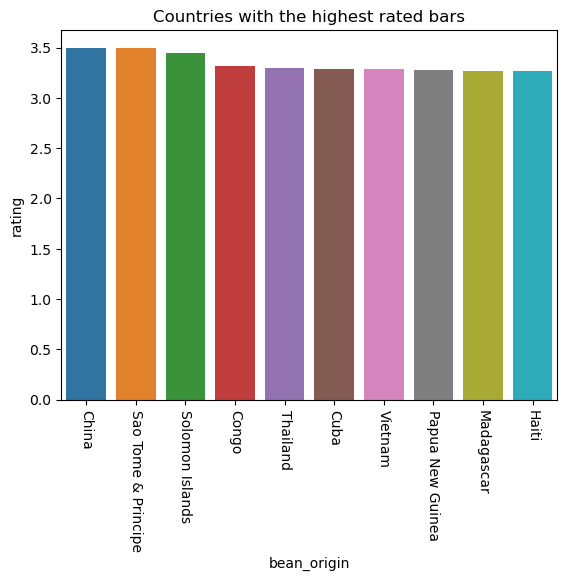

In [11]:
viz1 = sns.barplot(x='bean_origin', y='rating', data=c[0:10])
viz1.set_title('Countries with the highest rated bars')
viz1.set_xticklabels(viz1.get_xticklabels(), rotation = -90);

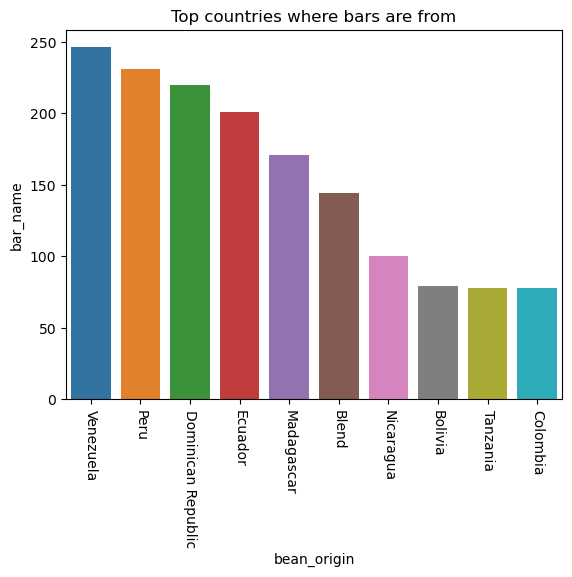

In [12]:
#question 2 viz
d = pd.DataFrame(choc.groupby('bean_origin')['bar_name'].count().sort_values(ascending=False))
d['bean_origin'] = d.index
viz2 = sns.barplot(x='bean_origin', y='bar_name', data=d[0:10])
viz2.set_title('Top countries where bars are from')
viz2.set_xticklabels(viz2.get_xticklabels(), rotation = -90);

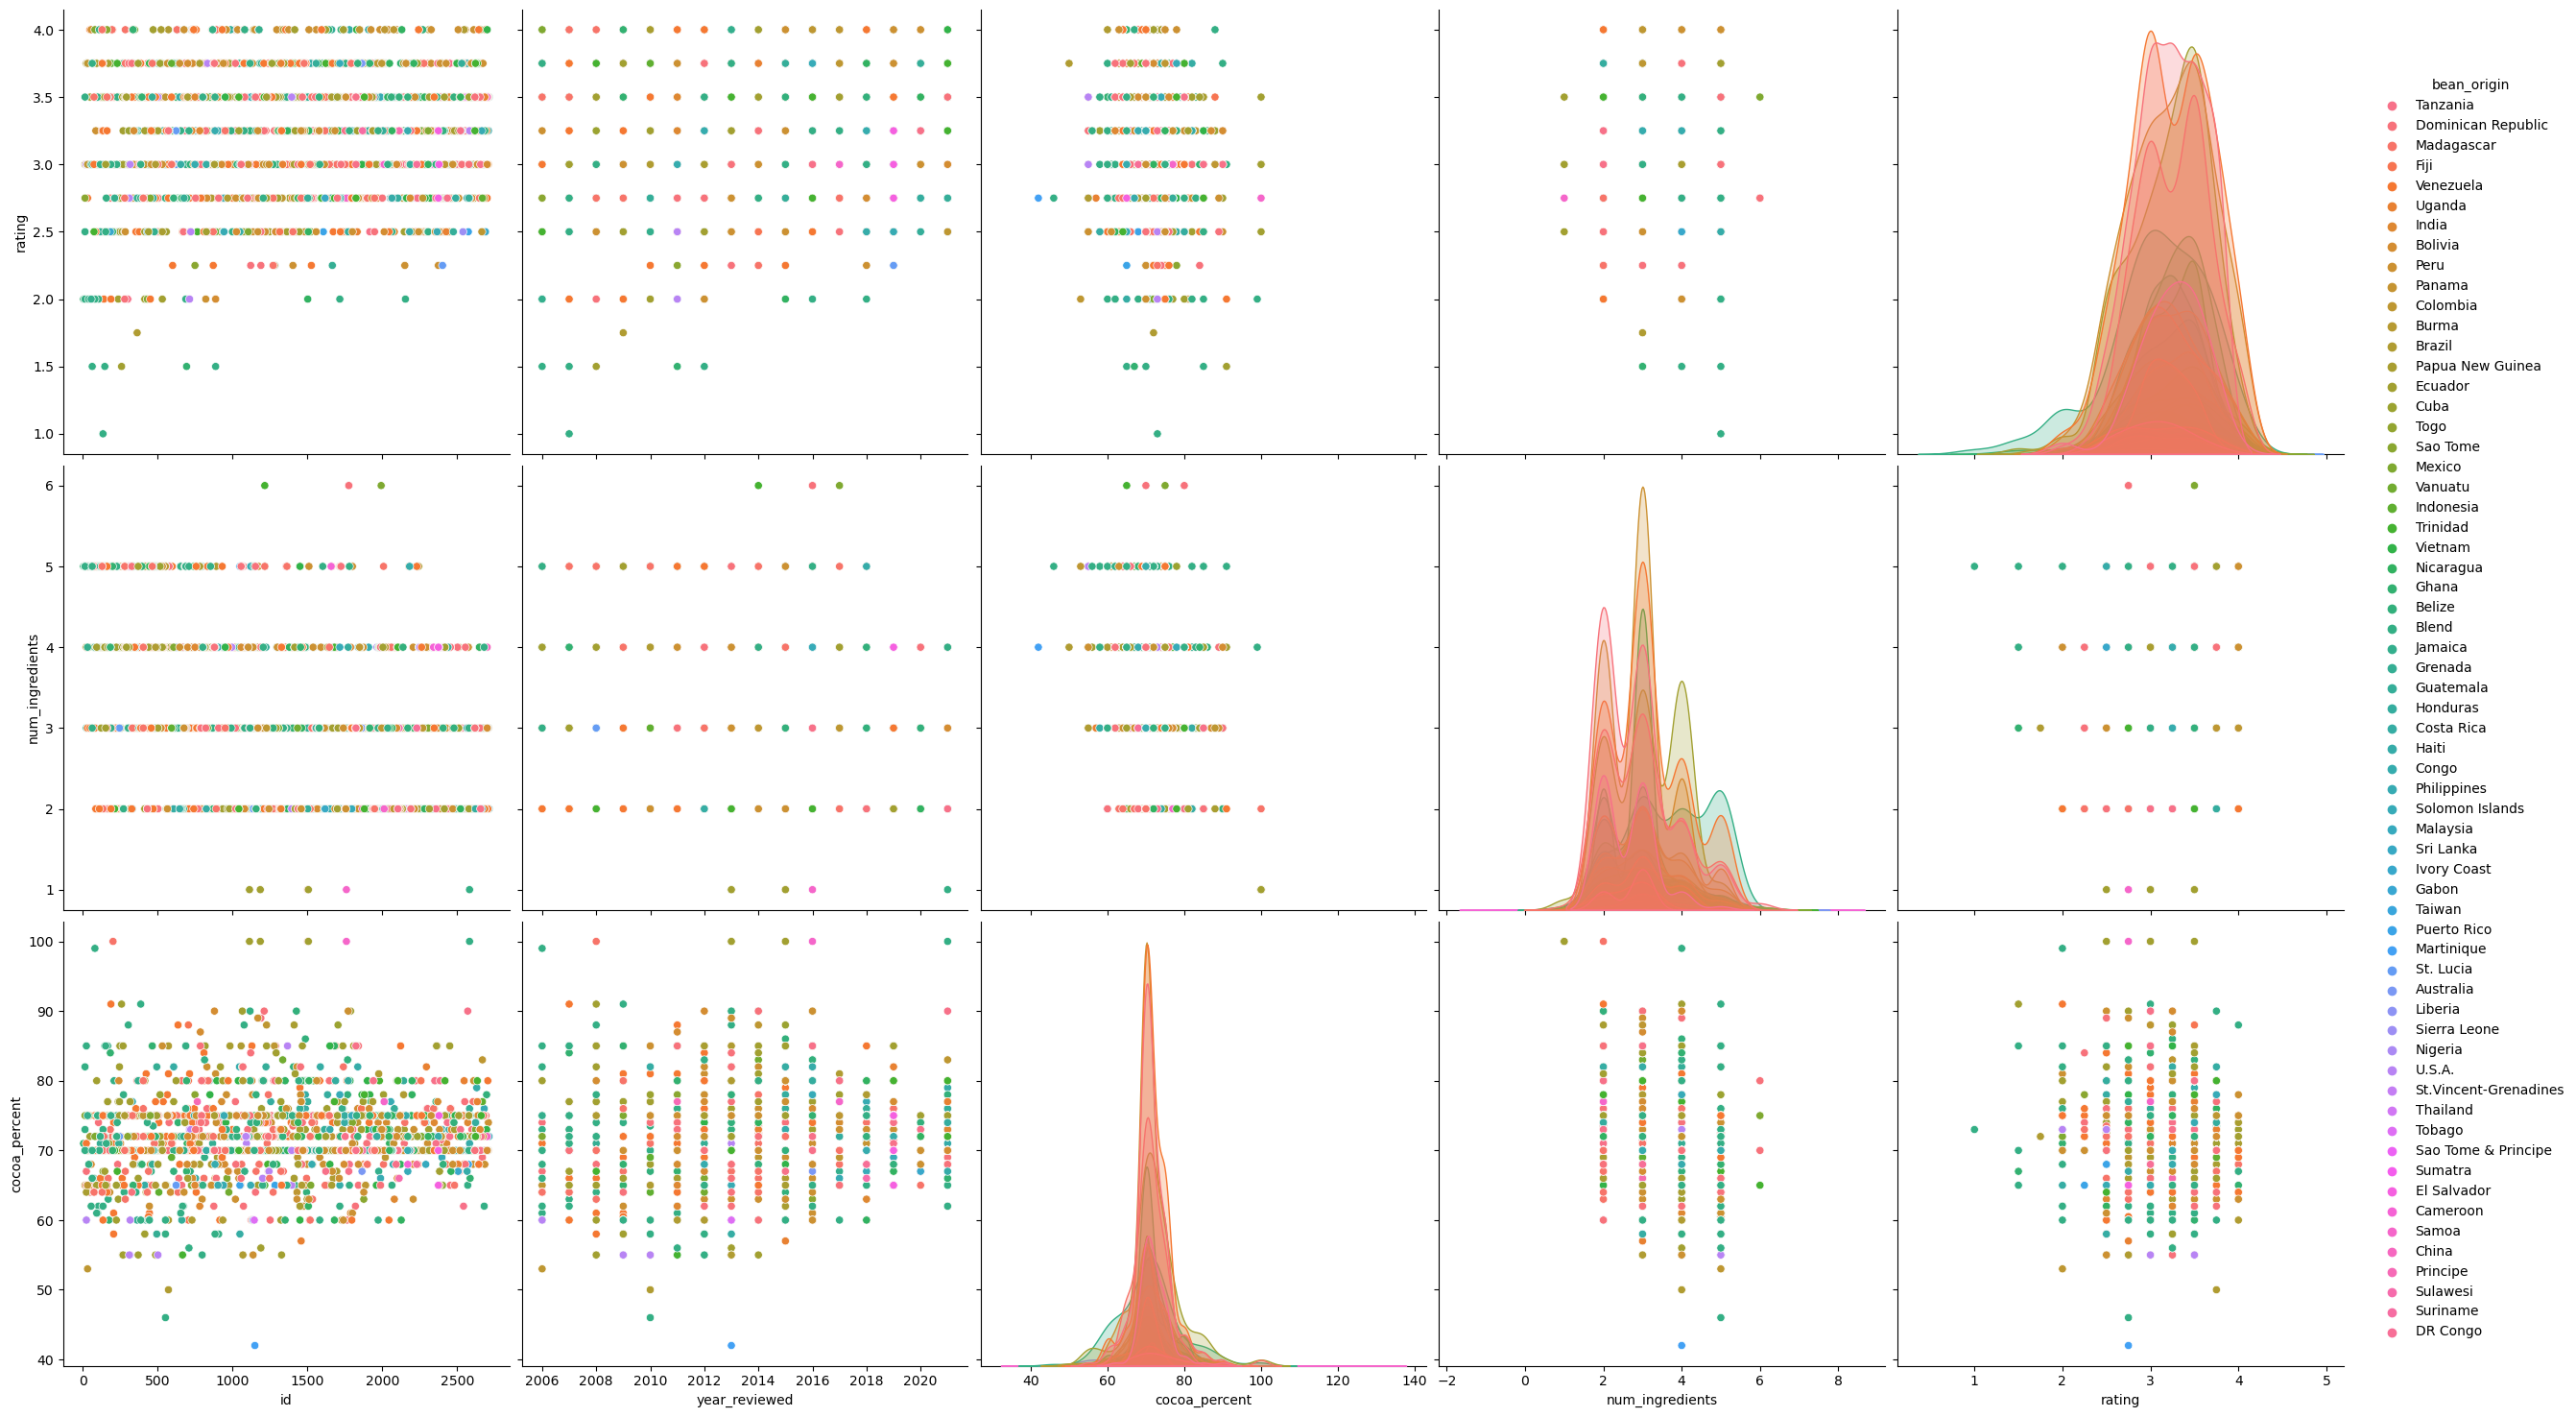

In [14]:
#Is the cacao bean's origin an indicator of quality?
sns.pairplot(choc,hue = 'bean_origin', y_vars=['rating', 'num_ingredients', 'cocoa_percent'], height=5, aspect=1.0) #hue is grouping colour


Text(0.5, 1.0, 'Relationship between Cocoa content and Rating')

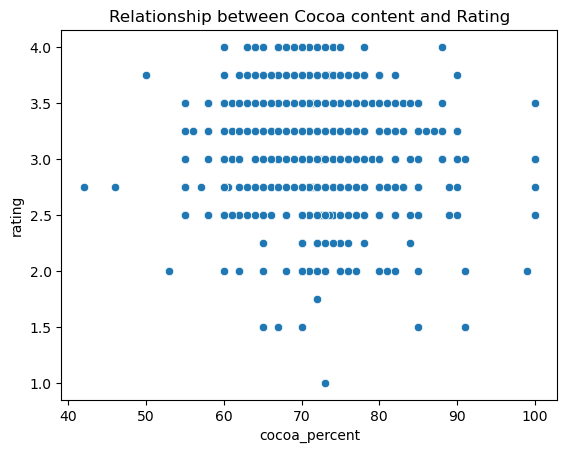

In [15]:
#How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
viz3 = sns.scatterplot(x='cocoa_percent', y='rating', data=choc)
viz3.set_title('Relationship between Cocoa content and Rating')

In [16]:
#correlation
correlation_XY = choc['cocoa_percent'].corr(choc['rating'])
print(f'The correlation between cocoa_percent and rating is {round(correlation_XY,2)}')

The correlation between cocoa_percent and rating is -0.08


In [17]:
#average cocoa content for bars with higher ratings >3.5
ave = (choc[choc['rating'] >3.5]).cocoa_percent.mean()
print(f'The average cocoa content for bars with higher ratings is {round(ave,2)}%')
#subset = (choc['ratings'] > 3.5)

The average cocoa content for bars with higher ratings is 71.0%


#####  Insights:
This data does not show any clear relationship between percentage of cocoa in a bar and the rating of a bar, other factors might have an influence on rating.

In [18]:
#[Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
#bar_lecithin = ['L']
chocc = choc.dropna(axis=0)
ave_lecithin = chocc[chocc['ingredients'].str.contains('L')].rating.mean()
print(f'The average rating of bars with lecithin is {round(ave_lecithin,2)} points')
ave_no_lecithin = chocc[~chocc['ingredients'].str.contains('L')].rating.mean()
print(f'The average rating of bars without lecitihin is {round(ave_no_lecithin,2)} points')

The average rating of bars with lecithin is 3.15 points
The average rating of bars without lecitihin is 3.23 points


#### Summary
- This data set appears to have a time period between 2006 and 2021. 
- The number of ingredients range from 1 to 6, the average rating of a chocolate bar is 3.2, and the average cocoa percent is roughly 71.5.
- Amongst the 2530 bars reviewed, Venezuela, Peru, Dominican Republic, Ecuador and Madagascar had the highest number of bars under review.
- This data does not show any clear relationship between percentage of cocoa in a bar and the rating of a bar, other factors might have an influence on rating. 
- Bars without Lecitihin on average are rated higher than bars with Lecithin, this could be related to the widely held belief that Lecithin is often used as a 'mask' for poor quality Chocolate bars, although there is a negative correlation between the percent of cocoa in a bar and what that bar is rated, so ratings might be based on factors other than cocoa content/ ingredient content.
- The pairplot does not show any obvious relationship between the origin and quality(which was determined by rating, num_of_ingredients and cocoa percent) and so it is concluded that there is no obvious relationship between Bean Origin and Quality.